#Upload file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Test.csv to Data Test.csv
Saving Data Train.csv to Data Train.csv


# Inisiasi Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import  precision_score, f1_score, recall_score, roc_auc_score

# Inisiasi Dataframe

In [ ]:
train = pd.read_csv('Data Train.csv')
test = pd.read_csv('Data Test.csv')

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


#EDA

## Dataset Information

In [ ]:
print('jumlah baris dan kolom data train:')
display(train.shape)
print('')
train.info()

jumlah baris dan kolom data train:


(4250, 20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   

In [ ]:
print('jumlah baris dan kolom data test:')
display(test.shape)
print('')
test.info()

jumlah baris dan kolom data test:


(750, 20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    fl

create a function to changing feature object (categorical data) to int (numerical data)

In [ ]:
def encode_yes_no(value):
  if value == "yes":
    return 1
  elif value == "no":
    return 0
  else:
    return 0

train["is_churn"] = train["churn"].apply(encode_yes_no)
train["is_intl_plan"] = train["international_plan"].apply(encode_yes_no)
train["is_vm_plan"] = train["voice_mail_plan"].apply(encode_yes_no)

train.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,is_churn,is_intl_plan,is_vm_plan
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,no,0,0,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,no,0,0,0


## Visualize Feature Categorical

In [ ]:
def create_count_plot(feature, orient = "horizontal"):
  feature_agg = feature.value_counts()
  feature_index = feature_agg.index
  feature_values = feature_agg.values
  display(feature_agg)
  display(feature_agg/len(feature))
  print('')
  if orient == "horizontal":
    ax = sns.barplot(x = feature_index, y = feature_values)
    for i in ax.containers:
      ax.bar_label(i,)
    plt.show()
  elif orient == "vertical":
    ax = sns.barplot(y = feature_index, x = feature_values)
    for i in ax.containers:
      ax.bar_label(i,)
    plt.show()

In [ ]:
def target_mean_agg(features=[],target="churn_flag", data=train):
  usecol = features+[target]
  df_agg = data[usecol].groupby(features).agg([np.mean,np.min,np.max,np.var,"count"])
  return df_agg.sort_values([(target,"mean")],ascending=False)

def check_train_test_availability(features=None,train_data=train, test_data=test):
  train_col_list = train_data[features].unique().tolist()
  test_col_list = test_data[features].unique().tolist()
  cat_non_avail = [col for col in test_col_list if col not in train_col_list]
  return cat_non_avail

### Churn

no     3652
yes     598
Name: churn, dtype: int64

no     0.859294
yes    0.140706
Name: churn, dtype: float64

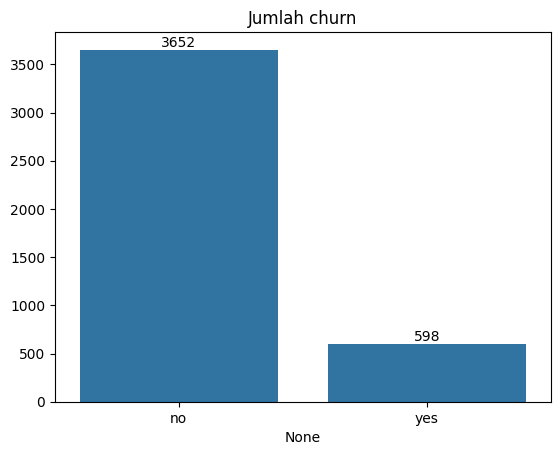

In [ ]:
plt.title('Jumlah churn')
create_count_plot(train["churn"], orient = "horizontal")

### State

In [ ]:
display(check_train_test_availability(features="state",train_data=train, test_data=test))
target_mean_agg(features = ["state"],
                target = "is_churn",
                data=train).head(10)

[]

is_churn                        
           mean min max       var count
state                                  
NJ     0.270833   0   1  0.199561    96
CA     0.256410   0   1  0.195682    39
WA     0.225000   0   1  0.176582    80
MD     0.220930   0   1  0.174145    86
MT     0.212500   0   1  0.169462    80
OK     0.205128   0   1  0.165168    78
NV     0.204819   0   1  0.164855    83
SC     0.194444   0   1  0.158842    72
TX     0.193878   0   1  0.157900    98
MS     0.182927   0   1  0.151310    82

### Area Code

[]

is_churn                        
                   mean min max       var count
area_code                                      
area_code_510  0.150568   0   1  0.128019  1056
area_code_408  0.139963   0   1  0.120484  1086
area_code_415  0.136148   0   1  0.117668  2108

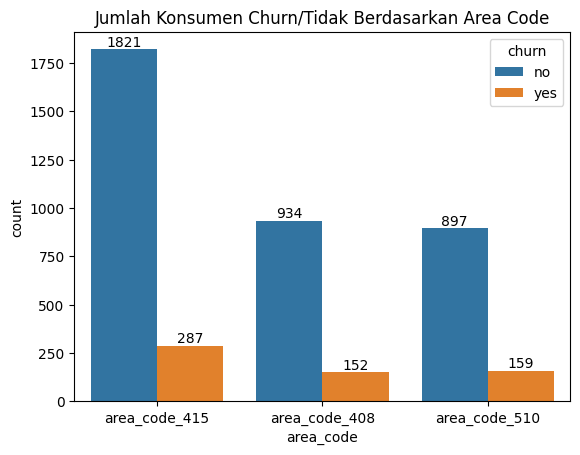

In [ ]:
print('')
plt.title('Jumlah Konsumen Churn/Tidak Berdasarkan Area Code')
ax = sns.countplot(x=train["area_code"],
              hue=train["churn"])
for i in ax.containers:
    ax.bar_label(i,)

display(check_train_test_availability(features="area_code",train_data=train, test_data=test))
target_mean_agg(features=["area_code"],
                target = "is_churn",
                data=train)

###International Plan

[]

is_churn                        
                        mean min max       var count
international_plan                                  
yes                 0.421717   0   1  0.244489   396
no                  0.111832   0   1  0.099351  3854

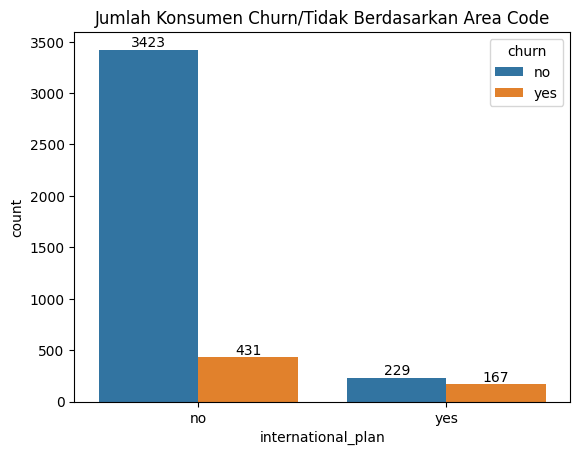

In [ ]:
print('')
plt.title('Jumlah Konsumen Churn/Tidak Berdasarkan Intl Plan')
ax = sns.countplot(x=train["international_plan"],
              hue=train["churn"])
for i in ax.containers:
    ax.bar_label(i,)

display(check_train_test_availability(features="international_plan",train_data=train, test_data=test))
target_mean_agg(features=["international_plan"],
                target = "is_churn",
                data=train)

### Voice Mail Plan

[]

is_churn                        
                     mean min max       var count
voice_mail_plan                                  
no               0.164436   0   1  0.137441  3138
yes              0.073741   0   1  0.068365  1112

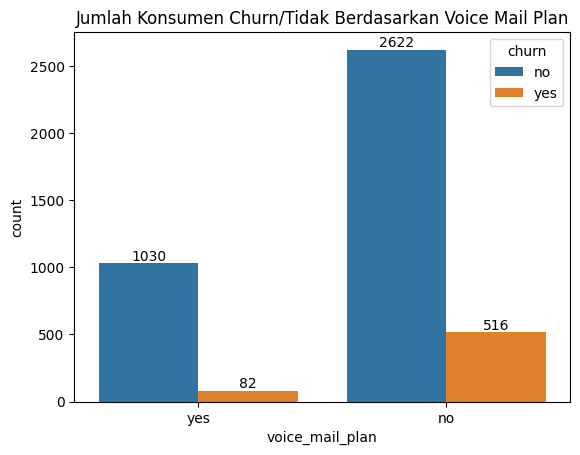

In [ ]:
print('')
plt.title('Jumlah Konsumen Churn/Tidak Berdasarkan Voice Mail Plan')
ax = sns.countplot(x=train["voice_mail_plan"],
              hue=train["churn"])
for i in ax.containers:
    ax.bar_label(i,)

display(check_train_test_availability(features="voice_mail_plan",train_data=train, test_data=test))
target_mean_agg(features=["voice_mail_plan"],
                target = "is_churn",
                data=train)

## Visualize Feature Numerical

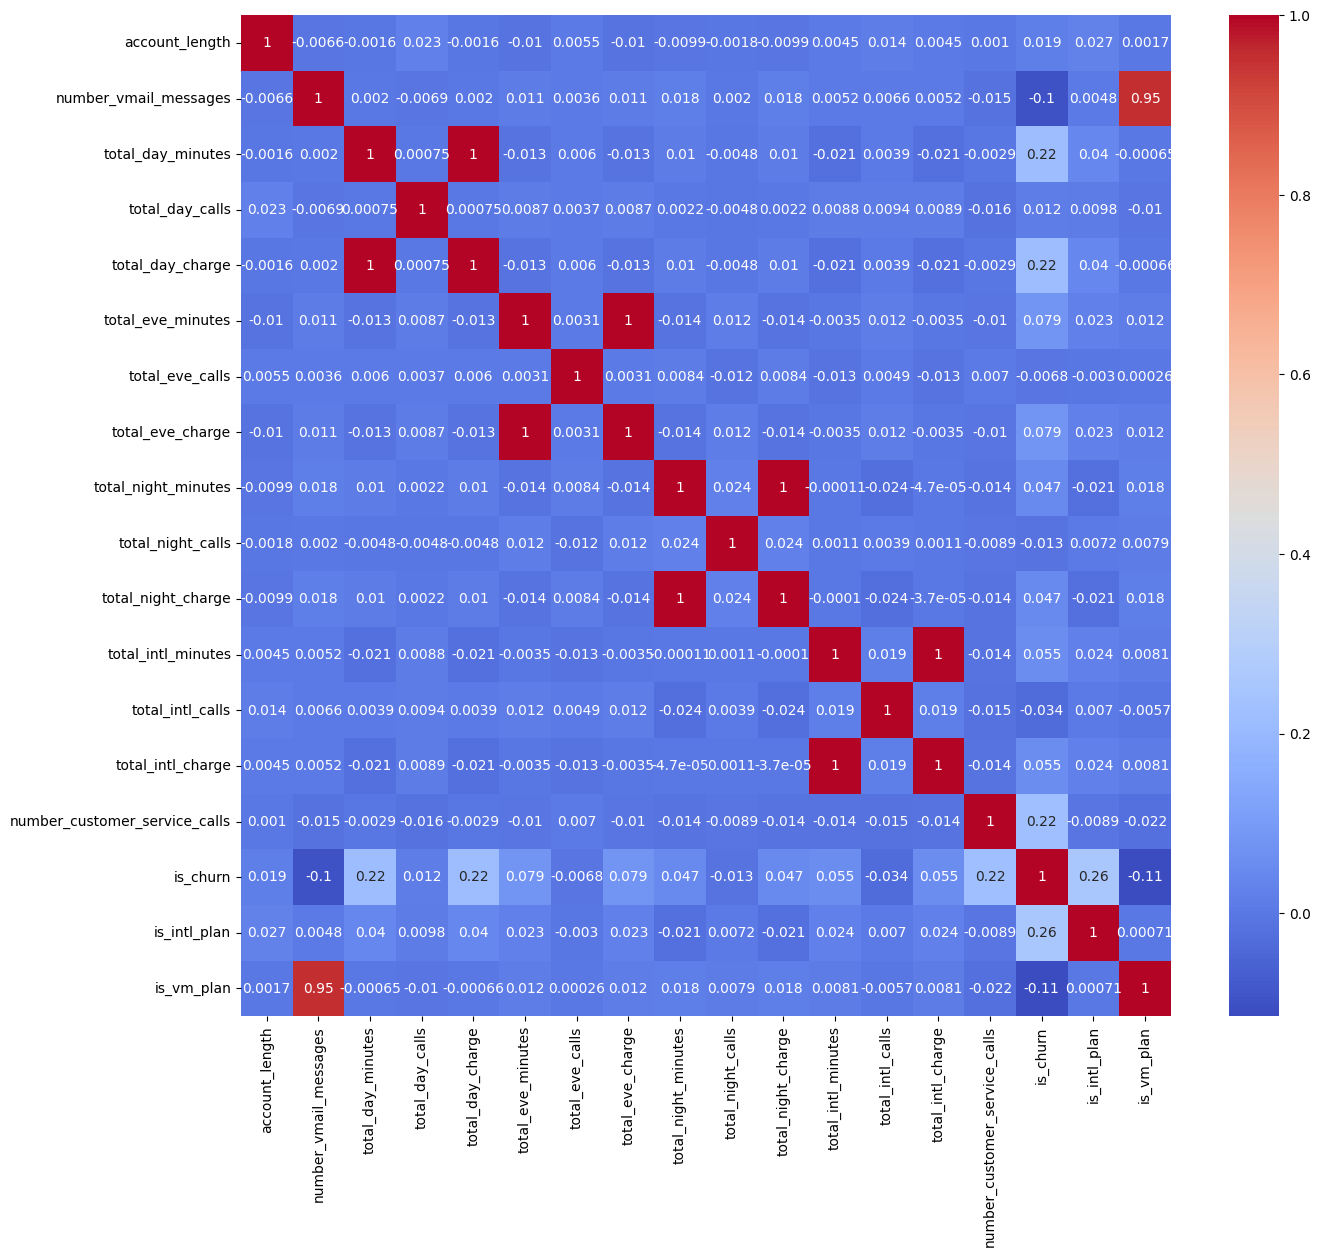

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
drop_col_1 = [c for c in train.columns if "minutes" in c]
drop_col_2 = ["number_vmail_messages"]
drop_col = drop_col_1+drop_col_2
train = train.drop(drop_col,axis=1,errors="ignore")

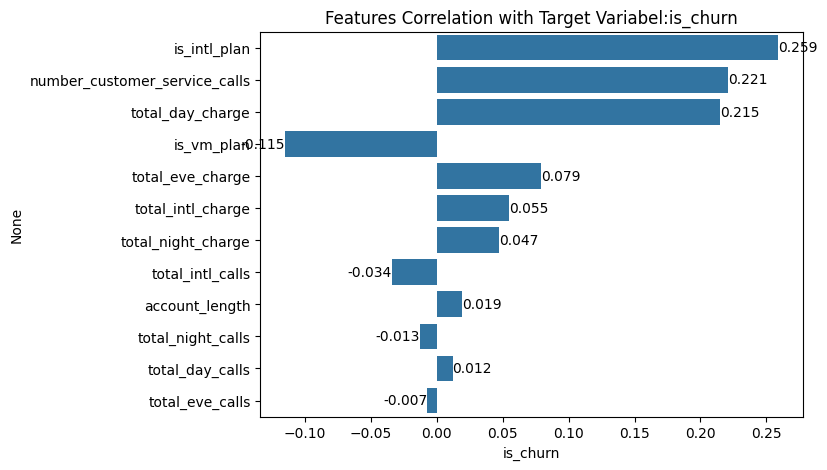

In [ ]:
def feature_corr_with_target(target="is_churn", features_filter = [], data=train):

  ### Data Correlation
  usecol = [c for c in data.corr().columns if c != target]
  if features_filter != []:
    usecol = [c for c in usecol if c in features_filter]
  else :
    pass

  df_corr = pd.DataFrame(data.corr()[target].loc[usecol])
  df_corr[target+"_abs"] = np.abs(df_corr[target])
  df_corr = df_corr.sort_values(target+"_abs", ascending=False)

  ### Construct Plot
  plt.figure(figsize=(7,5))
  ax = sns.barplot(y=df_corr.index,
                  x=round(df_corr["is_churn"],3))
  for i in ax.containers:
      ax.bar_label(i,)
  plt.title("Features Correlation with Target Variabel:{}".format(target))
  plt.show()

feature_corr_with_target(target="is_churn",
                         data=train)

###Number CS Calls

[]

number_customer_service_calls  is_churn                        
                                     mean min max       var count
7                             0  0.109481   0   1  0.097605   886
8                             1  0.108924   0   1  0.097123  1524
9                             2  0.107709   0   1  0.096209   947
6                             3  0.112903   0   1  0.100336   558
5                             4  0.440191   0   1  0.247608   209
2                             5  0.604938   0   1  0.241975    81
1                             6  0.678571   0   1  0.226190    28
3                             7  0.538462   0   1  0.269231    13
4                             8  0.500000   0   1  0.500000     2
0                             9  1.000000   1   1  0.000000     2

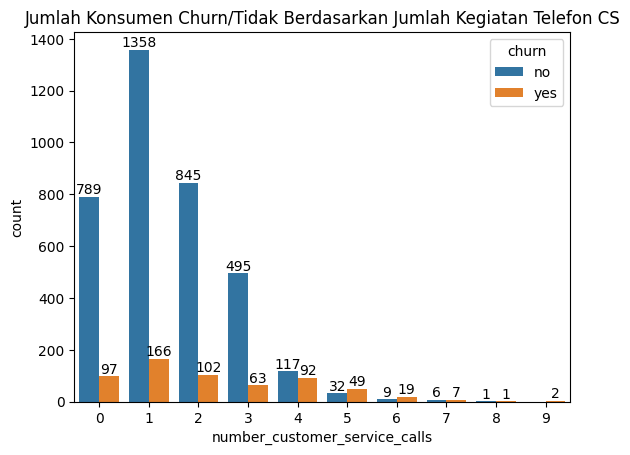

In [ ]:
print('')
plt.title('Jumlah Konsumen Churn/Tidak Berdasarkan Jumlah Kegiatan Telefon CS')
ax = sns.countplot(x=train["number_customer_service_calls"],
              hue=train["churn"])
for i in ax.containers:
    ax.bar_label(i,)

display(check_train_test_availability(features="number_customer_service_calls",train_data=train, test_data=test))
target_mean_agg(features=["number_customer_service_calls"],
                target = "is_churn",
                data=train).reset_index().sort_values("number_customer_service_calls",ascending=True)


#Data Preprocessing

## Checking Missing Values

In [ ]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
total_day_minutes                0
total_day_calls                  0
total_eve_minutes                0
total_eve_calls                  0
total_night_minutes              0
total_night_calls                0
total_intl_minutes               0
total_intl_calls                 0
number_customer_service_calls    0
churn                            0
is_churn                         0
is_intl_plan                     0
is_vm_plan                       0
dtype: int64

##Feature Engineering

In [ ]:
train.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,is_churn,is_intl_plan,is_vm_plan
0,OH,107,area_code_415,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,1,no,0,0,1
1,NJ,137,area_code_415,no,no,114,41.38,110,10.30,104,7.32,5,3.29,0,no,0,0,0
2,OH,84,area_code_408,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,2,no,0,1,0


In [ ]:
def new_feature(data = train):

  data['total_net_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls'] + data['total_intl_calls']
  data['total_net_charge'] = data['total_day_charge'] + data['total_eve_charge'] + data['total_night_charge'] + data['total_intl_charge']
  data['total'] = data['total_net_calls'] + data['total_net_charge']
  data['persentase_calls_all'] = data['total_net_calls']/data['total']
  data['persentase_charge_all'] = data['total_net_charge']/data['total']
  data['persentase_day_calls'] = data['total_day_calls'] / data['total_net_calls']
  data['persentase_night_calls'] = (data['total_night_calls'] / data['total_net_calls'])
  data['persentase_eve_calls'] = (data['total_eve_calls'] / data['total_net_calls'])
  data['persentase_day_charge'] = (data['total_day_charge'] / data['total_net_charge'])
  data['persentase_night_charge'] = (data['total_night_charge'] / data['total_net_charge'])
  data['persentase_eve_charge'] = (data['total_eve_charge'] / data['total_net_charge'])
  data['day_calls_per_charge'] = data['total_day_calls'] / data['total_day_charge']
  data['eve_calls_per_charge'] = data['total_eve_calls'] / data['total_eve_charge']
  data['night_calls_per_charge'] = data['total_night_calls'] / data['total_night_charge']

  data = data.fillna(0)
  return data
train = new_feature(data = train)

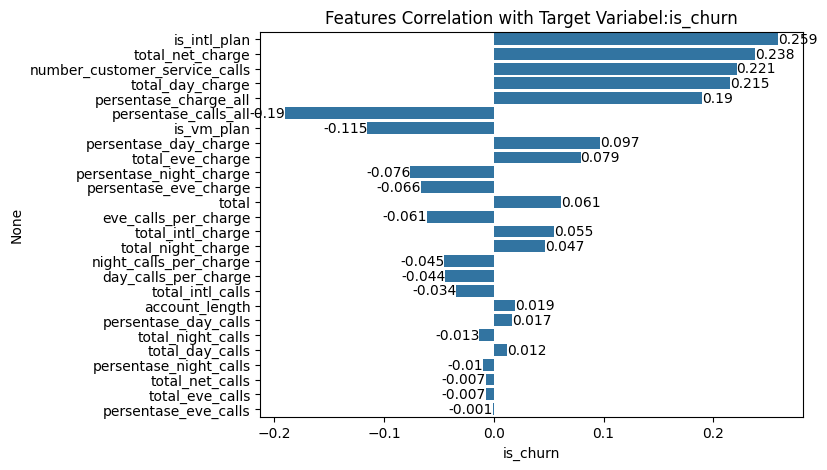

In [ ]:
### Check New Columns Feature Correlation with Target
feature_corr_with_target(target="is_churn", features_filter = [], data=train)

In [ ]:
def target_mean_encoding(features,target,data_train = train):
  df_encoding = data_train[[features,target]].groupby(features).mean()
  df_encoding.rename(columns={target:features+"_proba"},inplace=True)
  return df_encoding.reset_index()

def run_target_mean_encoding(data=train, data_train=train):
  master_state = target_mean_encoding(features="state",target="is_churn", data_train=train)
  master_area_code = target_mean_encoding(features="area_code",target="is_churn",data_train=train)
  drop_col_check =  ["state_proba","area_code_proba"]
  data.drop(drop_col_check,axis=1,errors="ignore",inplace=True)

  df_merge = pd.merge(data,master_state, on="state",how="left")
  df_merge = pd.merge(df_merge,master_area_code, on="area_code",how="left")

  return df_merge

train = run_target_mean_encoding(data=train, data_train = train)
train.head()


,state,account_length,area_code,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,...,persentase_night_calls,persentase_eve_calls,persentase_day_charge,persentase_night_charge,persentase_eve_charge,day_calls_per_charge,eve_calls_per_charge,night_calls_per_charge,state_proba,area_code_proba
0,OH,107,area_code_415,no,yes,123,27.47,103,16.62,103,...,0.310241,0.310241,0.463707,0.193282,0.280554,4.477612,6.197353,8.995633,0.126316,0.136148
1,NJ,137,area_code_415,no,no,114,41.38,110,10.30,104,...,0.312312,0.330330,0.664312,0.117515,0.165356,2.754954,10.679612,14.207650,0.270833,0.136148
2,OH,84,area_code_408,yes,no,71,50.90,88,5.26,89,...,0.349020,0.345098,0.761976,0.132635,0.078743,1.394892,16.730038,10.045147,0.126316,0.139963
3,OK,75,area_code_415,yes,no,113,28.34,122,12.61,121,...,0.337047,0.339833,0.544058,0.161451,0.242081,3.987297,9.674861,14.387634,0.205128,0.136148
4,MA,121,area_code_510,no,yes,88,37.09,108,29.62,118,...,0.367601,0.336449,0.473630,0.122207,0.378240,2.372607,3.646185,12.330199,0.157303,0.150568


## Checking same feature between data train & data test

In [ ]:
def pipeline_feature_preprocessing(data):

  print("[INFO] Encode Yes_No Column into binary value")
  data["is_intl_plan"] = data["international_plan"].apply(encode_yes_no)
  data["is_vm_plan"] = data["voice_mail_plan"].apply(encode_yes_no)

  print("[INFO] Drop Highly Correlated Features")
  drop_col_1 = [c for c in data.columns if "minutes" in c]
  drop_col_2 = ["number_vmail_messages"]
  drop_col = drop_col_1+drop_col_2
  data = data.drop(drop_col,axis=1,errors="ignore")

  print("[INFO] Target Mean Encoding for Categorical Features")
  data = run_target_mean_encoding(data=data, data_train = train)

  print("[INFO] Add New Features")
  data = new_feature(data=data)

  print("[INFO] Define All Used Columns for Modelling Purpose")
  drop_col = ["id","state","area_code","churn","international_plan","voice_mail_plan"]
  data = data.drop(drop_col, axis=1,errors="ignore")

  return data


df_train = pipeline_feature_preprocessing(data=train)
df_test = pipeline_feature_preprocessing(data=test)
print(df_train.shape, df_test.shape)

[INFO] Encode Yes_No Column into binary value
[INFO] Drop Highly Correlated Features
[INFO] Target Mean Encoding for Categorical Features
[INFO] Add New Features
[INFO] Define All Used Columns for Modelling Purpose
[INFO] Encode Yes_No Column into binary value
[INFO] Drop Highly Correlated Features
[INFO] Target Mean Encoding for Categorical Features
[INFO] Add New Features
[INFO] Define All Used Columns for Modelling Purpose
(4250, 29) (750, 28)


In [ ]:
display(df_train.head(2))
display(df_test.head(2))

,account_length,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,...,persentase_night_calls,persentase_eve_calls,persentase_day_charge,persentase_night_charge,persentase_eve_charge,day_calls_per_charge,eve_calls_per_charge,night_calls_per_charge,state_proba,area_code_proba
0,107,123,27.47,103,16.62,103,11.45,3,3.70,1,...,0.310241,0.310241,0.463707,0.193282,0.280554,4.477612,6.197353,8.995633,0.126316,0.136148
1,137,114,41.38,110,10.30,104,7.32,5,3.29,0,...,0.312312,0.330330,0.664312,0.117515,0.165356,2.754954,10.679612,14.207650,0.270833,0.136148


,account_length,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,...,persentase_charge_all,persentase_day_calls,persentase_night_calls,persentase_eve_calls,persentase_day_charge,persentase_night_charge,persentase_eve_charge,day_calls_per_charge,eve_calls_per_charge,night_calls_per_charge
0,128,110,45.07,99,16.78,91,11.01,3,2.7,1,...,0.199598,0.363036,0.300330,0.326733,0.596480,0.145712,0.222075,2.440648,5.899881,8.265213
1,118,98,37.98,101,18.75,118,9.18,6,1.7,0,...,0.173088,0.303406,0.365325,0.312693,0.561751,0.135779,0.277326,2.580305,5.386667,12.854031


#Modelling

##Train Test Split

In [ ]:
drop_col = []
target_col = ["is_churn"]
X = df_train.drop(drop_col+target_col,axis=1)
y = df_train[target_col]

col_for_model = X.columns.tolist()
df_test_model = df_test[col_for_model]
print(X.shape, y.shape)

(4250, 28) (4250, 1)


In [ ]:
X.head(2)

,account_length,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,...,persentase_night_calls,persentase_eve_calls,persentase_day_charge,persentase_night_charge,persentase_eve_charge,day_calls_per_charge,eve_calls_per_charge,night_calls_per_charge,state_proba,area_code_proba
0,107,123,27.47,103,16.62,103,11.45,3,3.70,1,...,0.310241,0.310241,0.463707,0.193282,0.280554,4.477612,6.197353,8.995633,0.126316,0.136148
1,137,114,41.38,110,10.30,104,7.32,5,3.29,0,...,0.312312,0.330330,0.664312,0.117515,0.165356,2.754954,10.679612,14.207650,0.270833,0.136148


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4250 entries, 0 to 4249
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   total_day_calls                4250 non-null   int64  
 2   total_day_charge               4250 non-null   float64
 3   total_eve_calls                4250 non-null   int64  
 4   total_eve_charge               4250 non-null   float64
 5   total_night_calls              4250 non-null   int64  
 6   total_night_charge             4250 non-null   float64
 7   total_intl_calls               4250 non-null   int64  
 8   total_intl_charge              4250 non-null   float64
 9   number_customer_service_calls  4250 non-null   int64  
 10  is_intl_plan                   4250 non-null   int64  
 11  is_vm_plan                     4250 non-null   int64  
 12  total_net_calls                4250 non-null   i

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

test_size = 0.33
seed = 42
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X,
                                                                  y,
                                                                  test_size=test_size,
                                                                  random_state=seed,
                                                                  stratify = y)
print("Data Train:",X_train.shape, Y_train.shape)
print("Data Test:",X_val.shape, Y_val.shape)

Data Train: (2847, 28) (2847, 1)
Data Test: (1403, 28) (1403, 1)


##Model

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
model_nb = GaussianNB()

print("Run Logistics Regression")
model_lr.fit(X_train, Y_train)
print("Run Decision Tree")
model_dt.fit(X_train, Y_train)
print("Run Random Forest")
model_rf.fit(X_train, Y_train)
print("Run Gradient Boosting")
model_gb.fit(X_train, Y_train)
print("Run Naive Bayes")
model_nb.fit(X_train, Y_train)

Run Logistics Regression
Run Decision Tree
Run Random Forest
Run Gradient Boosting
Run Naive Bayes


GaussianNB()

In [ ]:
model_list = ["model_lr","model_dt","model_rf","model_gb","model_nb"]
score_train = []
score_test = []
for model in model_list:
  open_model = eval(model)
  result_train = open_model.score(X_train,Y_train)
  result_test = open_model.score(X_val,Y_val)
  score_train.append(result_train)
  score_test.append(result_test)

df_eval = pd.DataFrame()
df_eval["model"] = model_list
df_eval["acc_train"] = score_train
df_eval["acc_test"] = score_test
df_eval

,model,acc_train,acc_test
0,model_lr,0.859501,0.856736
1,model_dt,1.000000,0.951532
2,model_rf,0.999649,0.970777
3,model_gb,0.981384,0.977192
4,model_nb,0.838778,0.831076


In [ ]:
def model_comparison_engine(X=X, y=y, fold = 5, sampling_method = None):

  kfold = model_selection.KFold(n_splits=fold, shuffle = True, random_state=42)

  model_lr = LogisticRegression()
  model_dt = DecisionTreeClassifier()
  model_rf = RandomForestClassifier()
  model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
  model_nb = GaussianNB()

  model_list = ["model_lr","model_dt","model_rf","model_gb","model_nb"]
  acc_list = []
  prec_list = []
  rec_list = []
  auc_list = []
  f1_list = []
  for model in model_list:
    print(model)
    open_model = eval(model)

    if sampling_method == 'SMOTE':
      X_resampled, y_resampled = SMOTE().fit_resample(X, y)
    elif sampling_method == 'oversampling':
      X_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)
    elif sampling_method == 'undersampling':
      X_resampled, y_resampled = RandomUnderSampler().fit_resample(X, y)
    else:
      X_resampled, y_resampled = X, y

    accuracy = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
    precision = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='precision')
    recall = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='recall')
    auc = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='roc_auc')
    f1 = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='f1')

    acc_list.append(accuracy.mean())
    prec_list.append(precision.mean())
    rec_list.append(recall.mean())
    auc_list.append(auc.mean())
    f1_list.append(f1.mean())

  df_eval = pd.DataFrame()
  df_eval["model"] = model_list
  df_eval["accuracy"] = acc_list
  df_eval["precision"] = prec_list
  df_eval["recall"] = rec_list
  df_eval["auc"] = auc_list
  df_eval["f1_score"] = f1_list

  return df_eval

In [ ]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = None)

model_lr
model_dt
model_rf
model_gb
model_nb


,model,accuracy,precision,recall,auc,f1_score
0,model_lr,0.859765,0.507209,0.083868,0.754469,0.142604
1,model_dt,0.954118,0.822113,0.849786,0.911576,0.831096
2,model_rf,0.975059,0.996153,0.821740,0.918309,0.904723
3,model_gb,0.977176,0.992523,0.844987,0.926686,0.912601
4,model_nb,0.822353,0.418348,0.676056,0.818368,0.516592


In [ ]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = "SMOTE")

model_lr
model_dt
model_rf
model_gb
model_nb


,model,accuracy,precision,recall,auc,f1_score
0,model_lr,0.805722,0.813202,0.795424,0.874750,0.803811
1,model_dt,0.906490,0.890529,0.921494,0.907365,0.908475
2,model_rf,0.952765,0.981507,0.920086,0.989309,0.951306
3,model_gb,0.914158,0.993873,0.833162,0.960132,0.906641
4,model_nb,0.710431,0.678338,0.801052,0.809456,0.734453


In [ ]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = "oversampling")

model_lr
model_dt
model_rf
model_gb
model_nb


,model,accuracy,precision,recall,auc,f1_score
0,model_lr,0.721112,0.721444,0.721254,0.778351,0.721065
1,model_dt,0.981381,0.970787,0.998660,0.982437,0.982350
2,model_rf,0.998768,0.999463,0.998335,0.999151,0.998613
3,model_gb,0.934558,0.996932,0.871881,0.965137,0.930277
4,model_nb,0.737814,0.723641,0.770470,0.825141,0.746188


In [ ]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = "undersampling")

model_lr
model_dt
model_rf
model_gb
model_nb


,model,accuracy,precision,recall,auc,f1_score
0,model_lr,0.712371,0.712764,0.712952,0.772450,0.711735
1,model_dt,0.877106,0.869536,0.884324,0.873335,0.871847
2,model_rf,0.903853,0.936463,0.864355,0.919014,0.895833
3,model_gb,0.928947,0.989929,0.865926,0.930850,0.924309
4,model_nb,0.731614,0.710931,0.788911,0.821436,0.745637


##Run Selected Model

In [ ]:
def train_model(X,y):
  model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
  model_gb.fit(X,y)
  return model_gb
model_churn = train_model(X,y)

##Predict Data Test

In [ ]:
test["is_churn"] = model_churn.predict(df_test_model)
test["churn"] = test["is_churn"].apply(lambda x:"yes" if x==1 else "no")
test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,is_intl_plan,is_vm_plan,is_churn,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,0,1,0,no
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,118,9.18,6.3,6,1.70,0,1,0,0,no
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,99,9.14,13.1,6,3.54,4,0,0,0,no
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,121,5.83,8.1,3,2.19,3,0,0,0,no
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,115,11.28,15.5,5,4.19,3,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,111,9.12,11.3,7,3.05,0,0,0,0,no
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,112,10.88,12.3,2,3.32,3,0,0,0,no
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,113,9.61,14.7,2,3.97,3,0,0,0,no
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,97,9.56,13.6,4,3.67,1,0,0,0,no


In [ ]:
test.value_counts('churn')

churn
no     657
yes     93
dtype: int64

#Model Interpretation (Feature Importance)

In [ ]:
df_imp = pd.DataFrame()
df_imp["features"] = X.columns.tolist()
df_imp["importance"] = model_churn.feature_importances_
df_imp.sort_values("importance",ascending=False)

,features,importance
13,total_net_charge,4.941428e-01
11,is_vm_plan,1.227618e-01
9,number_customer_service_calls,1.225548e-01
8,total_intl_charge,9.247334e-02
7,total_intl_calls,8.123454e-02
10,is_intl_plan,7.760186e-02
0,account_length,2.092699e-03
25,night_calls_per_charge,2.073021e-03
19,persentase_eve_calls,1.291177e-03
14,total,1.058621e-03


#Explain Model

In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.9 MB/s eta 0:00:00


In [ ]:
## Tree Based Model
# Create SHAP explainer
explainer = shap.Explainer(model_churn, X)
# Calculate SHAP values
shap_values = explainer(df_test)

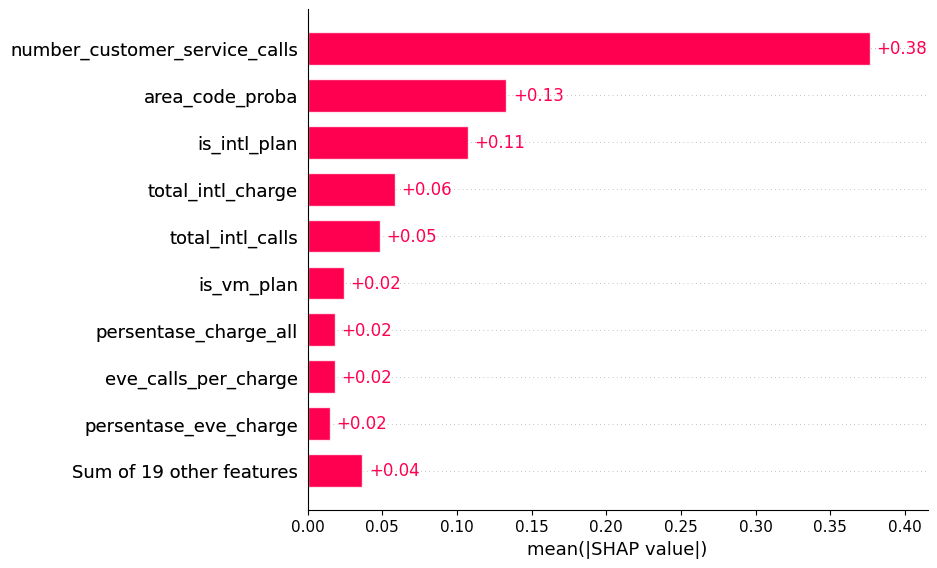

In [ ]:
# GLOBAL FEATURE CONTRIBUTION
shap.plots.bar(shap_values)

In [ ]:
# LOCAL FEATURE CONTRIBUTION
def predict_and_explain(data=test, id=1):
  df_test_filter_id = test[test.id==id]
  df_test = pipeline_feature_preprocessing(df_test_filter_id)
  df_test_model = df_test[col_for_model]
  prediction = model_churn.predict(df_test_model)
  if prediction == 1:
    print()
    print("Prediction = CHURN")
  else:
    print()
    print("Prediction = NOT CHURN")
  shap_values = explainer(df_test_model)
  shap.plots.bar(shap_values[0])

[INFO] Encode Yes_No Column into binary value
[INFO] Drop Highly Correlated Features
[INFO] Target Mean Encoding for Categorical Features
[INFO] Add New Features
[INFO] Define All Used Columns for Modelling Purpose

Prediction = NOT CHURN


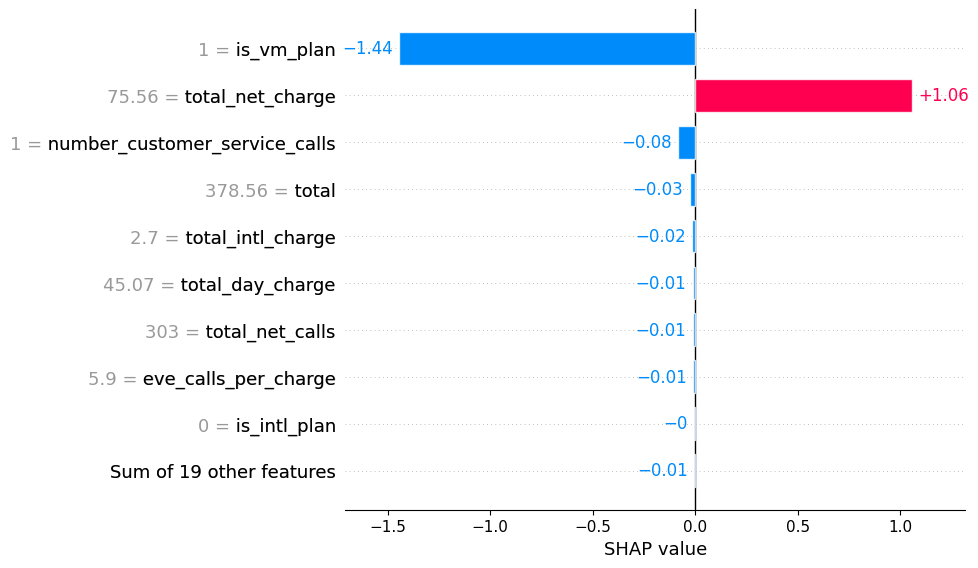

In [ ]:
predict_and_explain(data=test, id=1)

[INFO] Encode Yes_No Column into binary value
[INFO] Drop Highly Correlated Features
[INFO] Target Mean Encoding for Categorical Features
[INFO] Add New Features
[INFO] Define All Used Columns for Modelling Purpose

Prediction = NOT CHURN


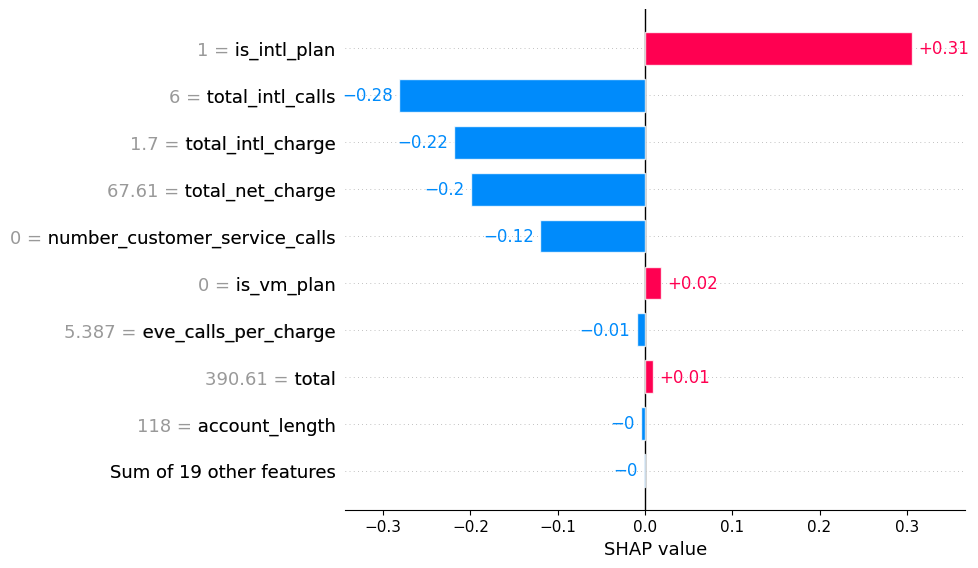

In [ ]:
predict_and_explain(data=test, id=2)

In [ ]:
test.head(3)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,is_intl_plan,is_vm_plan,is_churn,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,0,1,0,no
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,118,9.18,6.3,6,1.70,0,1,0,0,no
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,99,9.14,13.1,6,3.54,4,0,0,0,no
